## Importing Libraries

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, warnings, os.path, joblib
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore")
#RAMAZAN WAS HERE

## Insert Data

In [2]:
if os.path.isfile("Without_reason_injection_data_v4.csv"):
    print(111)

df = pd.read_csv("360_inj_cyc_e114_deneme.csv")

111


## Convert reason(injection defect) data to 0(OK) and 1 (NOK)

In [3]:
df['reason'] = df['reason'].replace(['[]'],0)
df['reason'][df['reason'] != 0] = 1
df = df.astype({"reason": int})


## Check null data

In [4]:
drop_list = ['Unnamed: 0', 'date', 'cntCycle','stsMachine','timestamp','sfc','decMold','prsInjectionHyd1','prsTransferHyd1','strCushion1','strPlasticisation1','strTransfer1']

In [5]:
df = df.drop(drop_list, axis=1)


In [6]:
df.to_csv("Without_reason_injection_data_v4.csv")

In [7]:
#Class count
count_class_0, count_class_1 = df.reason.value_counts()
#Divide by class
df_class_0 = df[df['reason'] == 0]
df_class_1 = df[df['reason'] == 1]

## Prepare validation data

In [8]:
df_test = pd.concat([df_class_0[:500] , df_class_1[:500]], join="inner")
df_train = pd.concat([df_class_0[500:] , df_class_1[500:]], join="inner")

In [9]:
y = df_train['reason']
X = df_train.drop(['reason'], axis=1)

## Normalization

In [10]:
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

## Prepare train and test data

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [12]:
np.any(np.isnan(X_train))

True

In [13]:
X_train = X_train.fillna(X_train.mean())

## Random Forest Classification

Confusion Matrix:
 [[7803    9]
 [ 136 1192]]
Accuracy:
 0.9841356673960613
Precision:
 0.9925062447960034
Recall:
 0.8975903614457831
AUC:
 0.9958976169655581


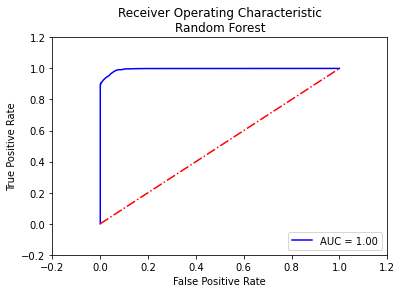

In [14]:
#Random Forest with 'entropy' criterion

rf2=RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=3)
model = rf2.fit(X_train,y_train)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Test and Validation

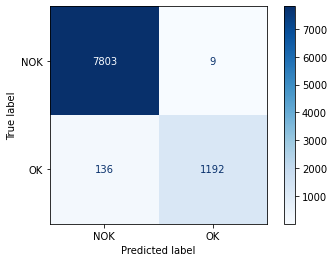

In [15]:
cm = metrics.confusion_matrix(y_val,y_rf2)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[7803    9]
 [ 136 1192]]
Accuracy:
 0.9841356673960613
Precision:
 0.9925062447960034
Recall:
 0.8975903614457831
AUC:
 0.9958976169655581


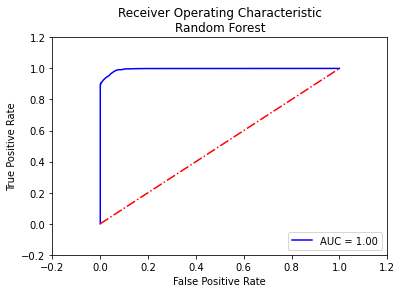

In [16]:
y_rf2_val=rf2.predict(X_val)
y_rf_prob2_val=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2_val))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2_val))
print("Precision:\n",metrics.precision_score(y_val,y_rf2_val))
print("Recall:\n",metrics.recall_score(y_val,y_rf2_val))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2_val))
auc=metrics.roc_auc_score(y_val,y_rf_prob2_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
#save model
joblib.dump(rf2, "./random_forest.joblib")
rf2 = joblib.load("./random_forest.joblib")


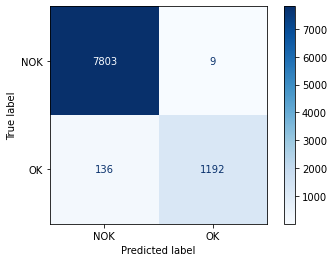

In [18]:
cm = metrics.confusion_matrix(y_val,y_rf2_val)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[7812    0]
 [ 179 1149]]
Accuracy:
 0.9804157549234136
Precision:
 1.0
Recall:
 0.865210843373494
AUC:
 0.932605421686747


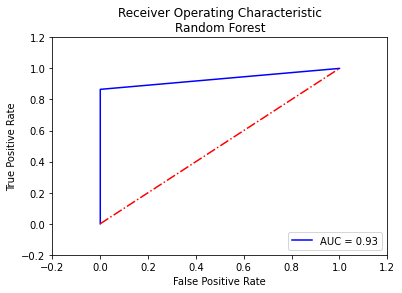

In [19]:
threshold = 0.9
y_rf_prob2_val = rf2.predict_proba(X_val)[:,1]
prob_thresh = (y_rf_prob2_val>=threshold).astype('int')
CM_2_Thresh = confusion_matrix(y_val,prob_thresh)
print("Confusion Matrix:\n", CM_2_Thresh)
print("Accuracy:\n",metrics.accuracy_score(y_val,prob_thresh))
print("Precision:\n",metrics.precision_score(y_val,prob_thresh))
print("Recall:\n",metrics.recall_score(y_val,prob_thresh))
print("AUC:\n",metrics.roc_auc_score(y_val,prob_thresh))

auc=metrics.roc_auc_score(y_val,prob_thresh)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,prob_thresh)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
#---------------------------------------------------------------------------------------------
#print(rf2.predict(X[28433:28434]))
#X[28433:28434]
#y[28433:28434]
#predict: 1 or 0; predict_proba: x(0-1) and 1-x
test_1 = [[999.0,80.55,230.3,254.8,230.1,250.8,255.0,235.0,
235.0,254.9,35.92,230.3,255.0,31.07,303.8,222.7,77.0,254.9,107.0,254.9,254.9,38.7,254.9,255.0,
234.9,234.9,31.42,254.9,46.18,255.0,234.9,235.0,2.48,1.57,0.125,0.33,4.28,190.0,234.9,235.1,
234.9,235.0,89.4,237.8,29.3,250.0,35.4,240.0,235.0,250.1,219.94,224.133,183.0,183.478,1.57,2.48,
5.36,254.9,254.9,255.0,254.9,1950.6,234.7,1233.8,248.9,1954.5,1241.8,1241.8,1956.1,84.27,7945.0,5.57,24.43]]
# 0 ok, 1 nok
test_0 = [[234.9,44.04,260.1,254.8,230.1,250.3,255.0,235.0,235.0,254.9,36.48,230.1,255.0,34.26,293.9,222.4,
77.0,254.9,107.0,254.9,255.0,38.9,254.9,254.9,234.8,234.9,37.31,255.0,46.17,254.9,234.9,235.0,2.65,1.58,
0.124,0.333,4.28,190.0,234.9,234.9,235.0,235.0,90.3,238.5,29.1,250.1,41.6,240.2,234.9,250.1,219.41,224.224,
176.01,181.643,1.58,2.65,5.31,254.9,254.9,255.0,254.9,1943.6,235.0,1213.4,250.7,1950.2,1234.3,1234.3,1952.0,84.74,7949.3,5.81,24.11]]

pre = scaler.transform(test_0)
pre = pd.DataFrame(pre)
print(rf2.predict_proba(pre))
#---------------------------------------------------------------------------------------------

[[0.98 0.02]]


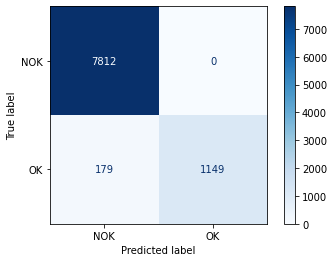

In [21]:
cm = metrics.confusion_matrix(y_val,prob_thresh)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

In [22]:
a = list(df.columns)
a.remove('reason')
names = a

In [23]:
importances = model.feature_importances_
feats = list(zip(list(importances),names))
feats.sort(key=lambda x: x[0], reverse = True)
for x in feats:
    print(x)

(0.07314040183587035, 'volCushion2')
(0.05820942808998211, 'volShot1')
(0.0560558998249128, 'timFill2')
(0.05273524382408991, 'timTransfer1')
(0.05211619314086305, 'frcClamp')
(0.050981660250724294, 'prsBackSpec2')
(0.049894982164260165, 'timTransfer2')
(0.04605736449252003, 'timFill1')
(0.029962267375189568, 'volPlasticisation1')
(0.025812983417415992, 'tmpMoldZone5')
(0.02543002675938892, 'volShot2')
(0.02428398385891179, 'prsTransferSpec2')
(0.024080351949781684, 'tmpMoldZone3')
(0.021159324459755612, 'tmpMoldZone1')
(0.01973057797727255, 'prsInjectionSpec2')
(0.018881076674640132, 'timMoldOpen')
(0.0185355455323843, 'tmpMoldZone4')
(0.015669698370670858, 'volPlasticisation2')
(0.015272636464944405, 'timCool1')
(0.015267886913320919, 'tmpBarrel2Zone2')
(0.015145873221413222, 'tmpMoldZone2')
(0.015030835120563855, 'timPlasticisation1')
(0.013853091370784124, 'timPlasticisation2')
(0.01337806414013065, 'tmpBarrel2Zone1')
(0.012380122439517582, 'prsTransferSpec1')
(0.011575296070002157

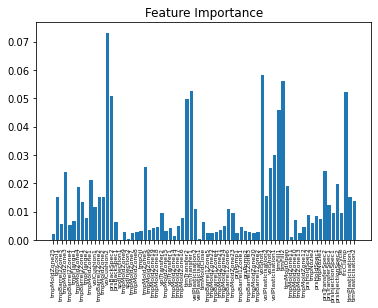

In [24]:
# Barplot: Add bars
plt.bar(range(X.shape[1]), importances)
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90, fontsize = 6)
# Create plot title
plt.title("Feature Importance")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Line Graph

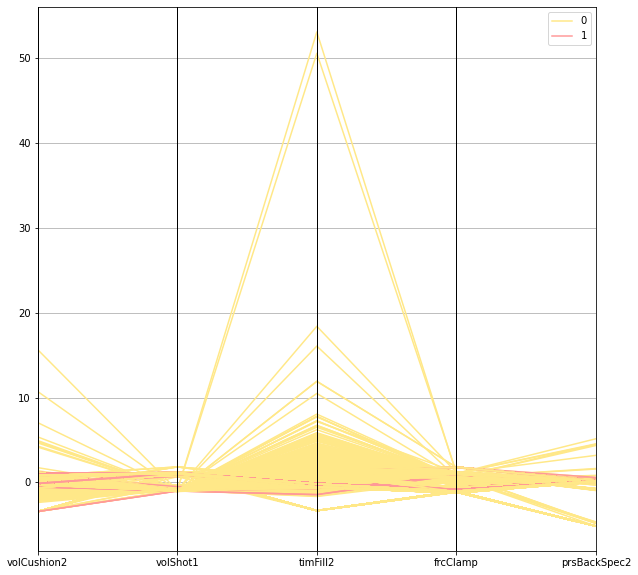

In [25]:
#Scaling attribute values to avoid few outiers
cols = ['volCushion2', 'volShot1', 'timFill2', 'frcClamp', 'prsBackSpec2']
subset_df = df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, df['reason']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
parallel_coordinates(final_df, 'reason', color=('#FFE888', '#FF9999'))

plt.show()

Box Graph

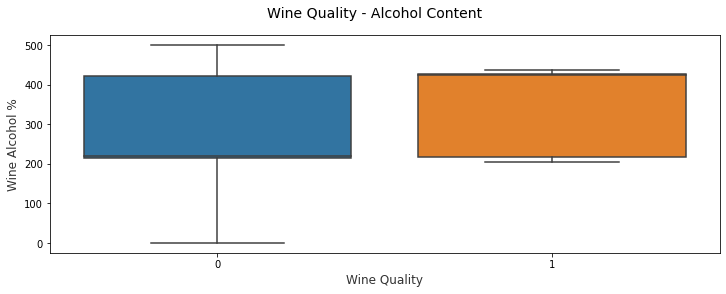

In [26]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="reason", y="volShot1", data=df,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

plt.show()